# Load Libraries

In [1]:
import sys
import os
import math
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import re
import gc

# Load Data

In [2]:
sstage = 11
lstage = 65 # 65
stages = [x for x in range(sstage, lstage+1)]
phs = [3.0, 4.0, 5.0, 6.0, 7.0]

In [3]:
reload = []
for n, ph in enumerate(phs):
    reload_sub = []
    for stage in stages:
        with open('data/pH_{}_stage_{}.dat'.format(ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    reload_sub.append([float(split_line[0]), float(split_line[1])])
    reload.append(reload_sub)

# Plotting for Y77 to D34

## Time Series

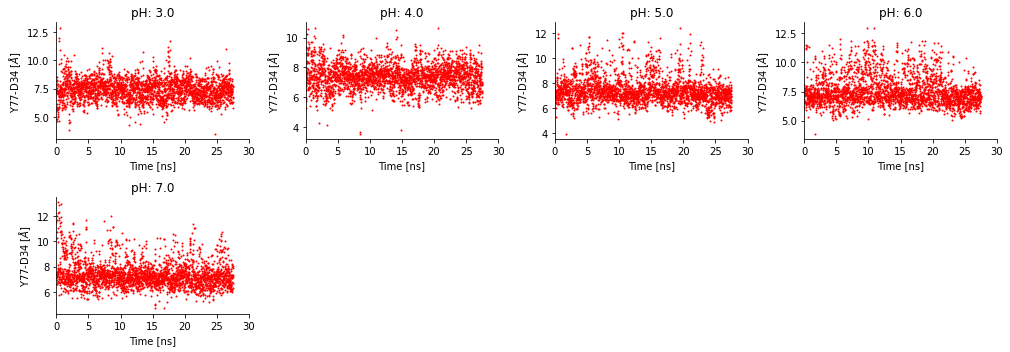

In [4]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].plot([x/100 for x in range(len(reload[index]))], [x[0] for x in reload[index]], 'r.', markersize = 2)
            # Plot Details 
            axes[index].set_xlabel('Time [ns]')
            axes[index].set_ylabel('Y77-D34 [$\AA$]')
            axes[index].set_title('pH: {}'.format(phs[index]))
        
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(2, 6)
            axes[index].set_xlim(0, 30)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('BB_rmsd_ts.pdf')
plt.show()


## Histograms

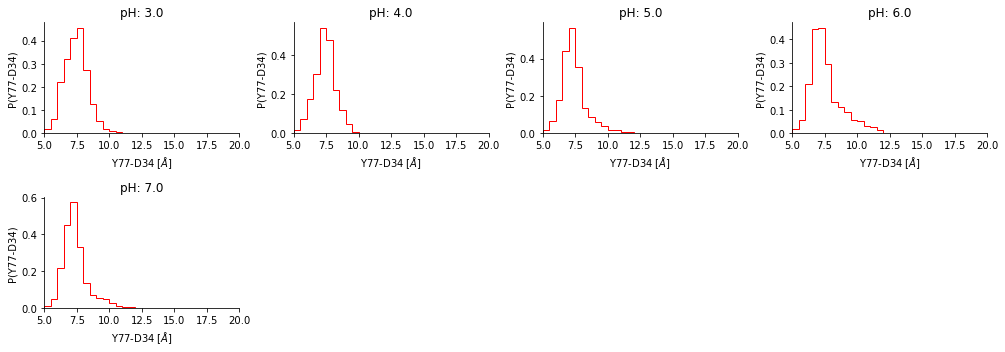

In [5]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].hist([x[0] for x in reload[index]], bins=40, range=[0, 20], density=True, histtype='step', color=['Red'])
            
            # Plot Details
            axes[index].set_xlabel('Y77-D34 [$\AA$]')
            axes[index].set_ylabel('P(Y77-D34)')
            axes[index].set_title('pH: {}'.format(phs[i*figcols+j]))            
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(0, 
            axes[index].set_xlim(5, 20)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('D156-K305_SB_Dist_Histo_IF.png', dpi=360)
plt.show()

# Plotting for V78 to D214

## Time Series

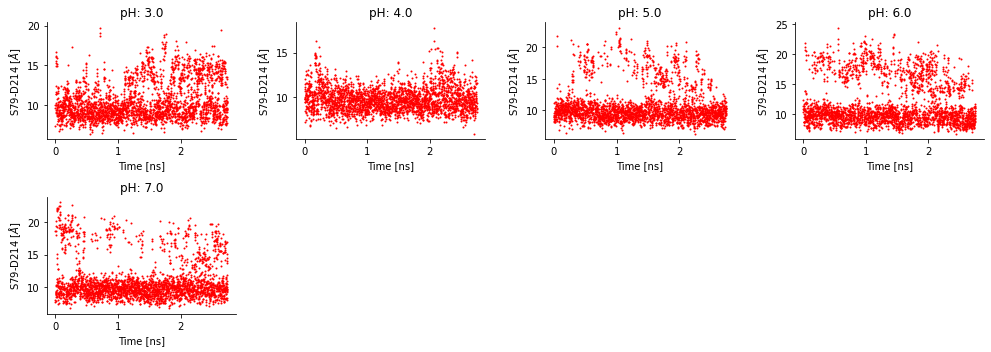

In [6]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].plot([x/1000 for x in range(len(reload[index]))], [x[1] for x in reload[index]], 'r.', markersize = 2)
            # Plot Details 
            axes[index].set_xlabel('Time [ns]')
            axes[index].set_ylabel('S79-D214 [$\AA$]')
            axes[index].set_title('pH: {}'.format(phs[index]))
        
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(2, 6)
            #axes[index].set_xlim(0, 8.0)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('BB_rmsd_ts.pdf')
plt.show()


## Histograms

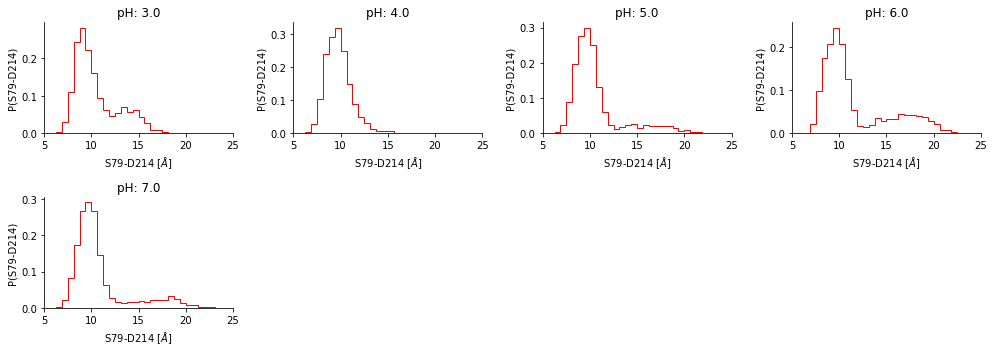

In [7]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].hist([x[1] for x in reload[index]], bins=40, range=[0, 25], density=True, histtype='step', color=['Red'])
            
            # Plot Details
            axes[index].set_xlabel('S79-D214 [$\AA$]')
            axes[index].set_ylabel('P(S79-D214)')
            axes[index].set_title('pH: {}'.format(phs[i*figcols+j]))            
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(0, 
            axes[index].set_xlim(5, 25)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('D156-K305_SB_Dist_Histo_IF.png', dpi=360)
plt.show()

In [8]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

In [9]:
import scipy.interpolate as interpolate
from matplotlib import cm
from matplotlib.ticker import AutoMinorLocator

In [10]:
colormap = cm.get_cmap('rainbow_r', len(phs))
colors = colormap(np.linspace(0, 1, len(phs)))
scale=100

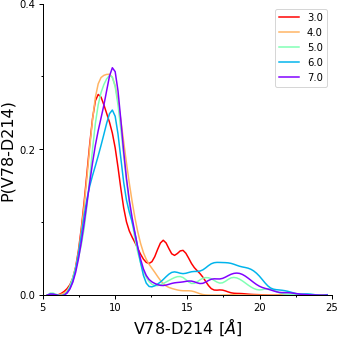

In [12]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

axes.set_xlabel('V78-D214 [$\AA$]', fontsize=16)
axes.set_ylabel('P(V78-D214)', fontsize=16)

# Just needs to be wrapped in a loop now. 
for n, ph in enumerate(phs):
    bin_heights, bin_borders = np.histogram([x[1] for x in reload[n]], bins=30, range=(5, 25), density=True)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x1_new = np.linspace(bin_centers[0], bin_centers[-1], 100)
    a_BSpline = interpolate.make_interp_spline(bin_centers, bin_heights, k=3)
    y1_new = a_BSpline(x1_new)
    axes.plot(x1_new, y1_new, color=colors[n])

axes.legend(phs) 
    
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Y-Axis 
axes.set_ylim(0, 0.4)
axes.set_yticks([0, 0.2, 0.4])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)

# X-Axis
axes.set_xlim(5, 25)
axes.set_xticks([5, 10, 15, 20, 25])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

fig.tight_layout()
plt.savefig("Renin_Compare_SI.pdf")
plt.show()